
Deterministic Environment Simulation:
Step 1:


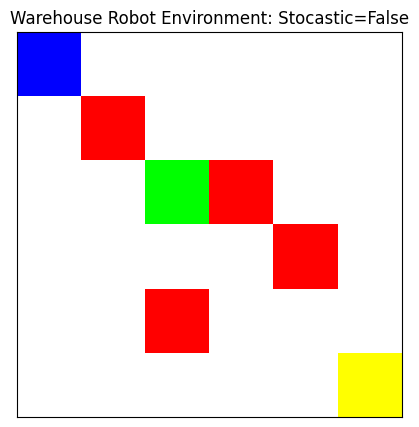

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -1

Step 2:


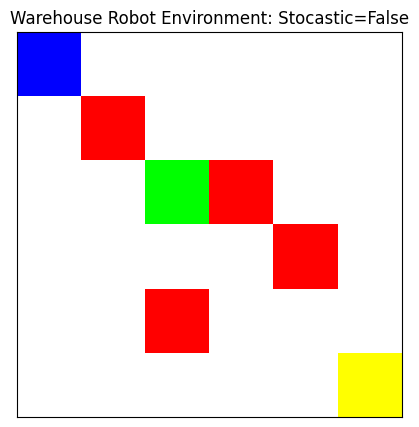

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -2

Step 3:


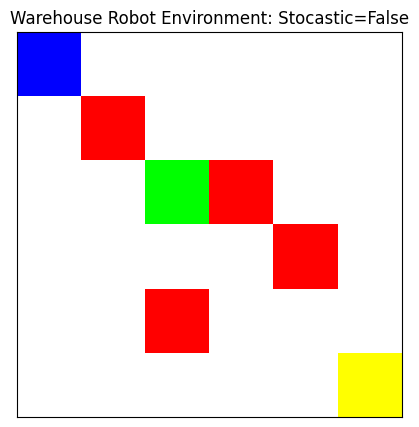

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -3

Step 4:


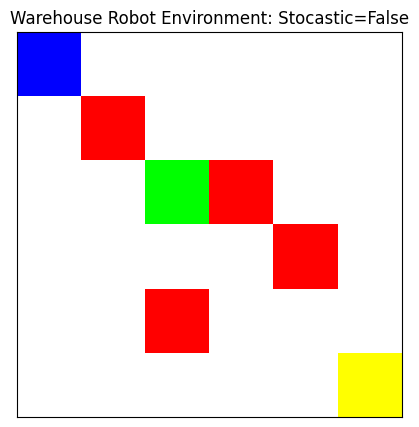

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -4

Step 5:


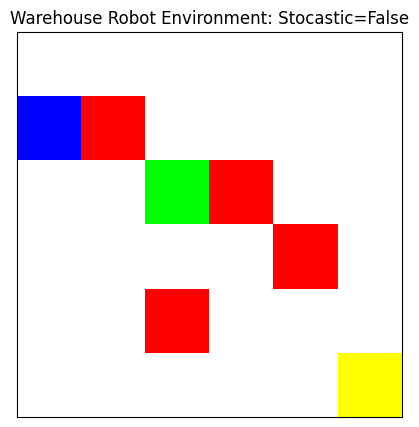

Action: Down
State: (1, 0, False), Reward: -1, Total Reward: -5


Stochastic Environment Simulation:
Step 1:


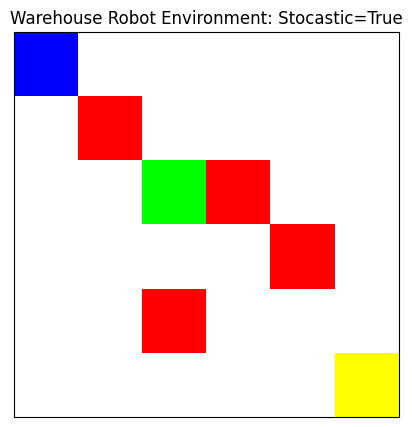

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -1

Step 2:


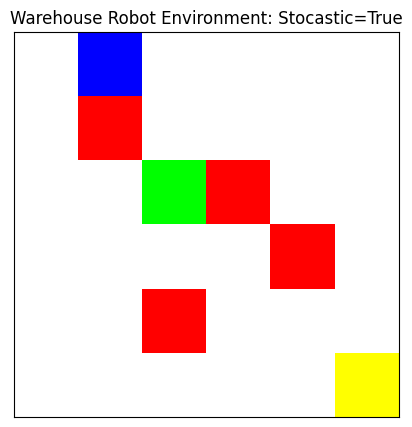

Action: Drop-off
State: (0, 1, False), Reward: -1, Total Reward: -2

Step 3:


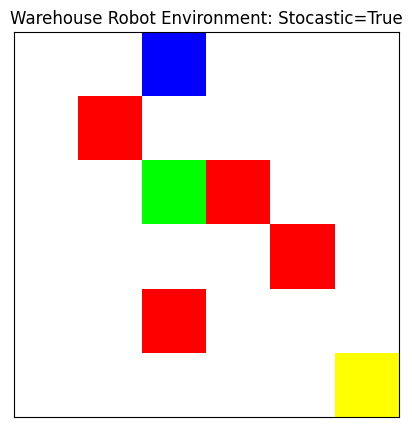

Action: Left
State: (0, 2, False), Reward: -1, Total Reward: -3

Step 4:


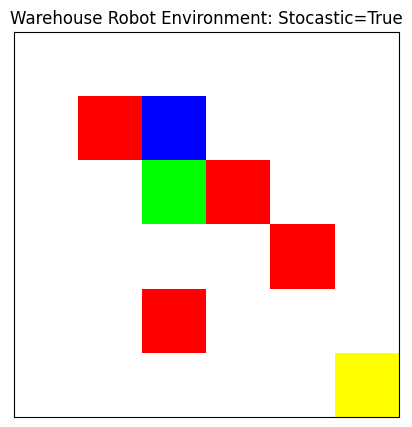

Action: Up
State: (1, 2, False), Reward: -1, Total Reward: -4

Step 5:


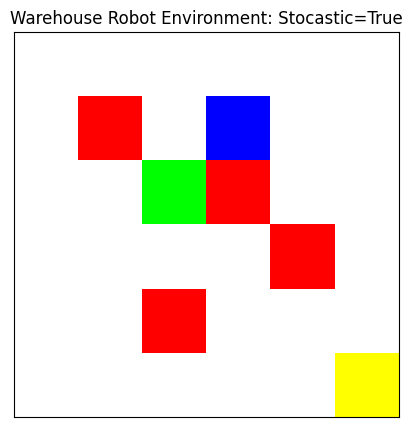

Action: Up
State: (1, 3, False), Reward: -1, Total Reward: -5



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random
import time

class WarehouseRobotEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, stochastic=False):
        super(WarehouseRobotEnv, self).__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation()
    
    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], self.carrying)
    
    def step(self, action):

        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])  # 10% chance of random movement(stochasticity)
        
        new_pos = self.agent_position[:]
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right
        
        reward = -1  # Default step penalty to encourage efficiency
        done = False

        if new_pos in self.obstacles:
            reward = -20  # Penalty for hitting an obstacle
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos  # Move only if not hitting an obstacle

        if action == 4 and self.agent_position == self.pickup_position and not self.carrying:
            self.carrying = True
            reward = 25  # Reward for picking up
        elif action == 5 and self.agent_position == self.dropoff_position and self.carrying:
            reward = 100  # Reward for successful delivery
            done = True  # Task complete i.e, successfully dropped off
        
        self.timesteps += 1
        self.total_reward += reward

        if self.timesteps >= 50:
            done = True  # Terminate after max steps
        
        return self._get_observation(), reward, done, {}
    
    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))  # White background

        # Set colors for different elements
        for obs in self.obstacles:
            grid[tuple(obs)] = [1, 0, 0]  # Obstacles (Red)
        
        grid[tuple(self.pickup_position)] = [0, 1, 0]  # Pickup location (Green)
        grid[tuple(self.dropoff_position)] = [1, 1, 0]  # Drop-off location (Yellow)
        grid[tuple(self.agent_position)] = [0, 0, 1]  # Agent (Blue)

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot Environment: Stocastic={self.stochastic}")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()
        time.sleep(0.1)  # Pause to visualize movement step by step

# Function to simulate an environment
def run_simulation(stochastic=False):
    print(f"\n{'Stochastic' if stochastic else 'Deterministic'} Environment Simulation:")
    env = WarehouseRobotEnv(stochastic=stochastic)
    obs = env.reset()
    total_reward = 0
    
    for step in range(5):
        action = env.action_space.sample()  # Choosing random random action from 0-5 (Up, Down, Left, Right, Pick-up, Drop-off)
        next_obs, reward, done, _ = env.step(action)
        total_reward += reward

        print(f"Step {step + 1}:")
        env.render()
        action_names = ['Up', 'Down', 'Left', 'Right', 'Pick-up', 'Drop-off']
        print(f"Action: {action_names[action]}")
        print(f"State: {next_obs}, Reward: {reward}, Total Reward: {total_reward}\n")
        
        if done:
            break

# Main function to run both simulations
def main():
    run_simulation(stochastic=False)  # Deterministic run
    run_simulation(stochastic=True)  # Stochastic run

if __name__ == "__main__":
    main()
